In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:90%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:10pt;padding:5px;}
table.dataframe{font-size:10px;}
</style>
"""))

# 1. 패키지로드 & 한글설정 & 경고메세지 ignore

In [32]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina')

sns.set(style='white', rc={'figure.figsize':(12,3)})
# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# 다른 폰트를 기본으로 하려면
# import matplotlib.font_manager as fm
# font_path = 'C:/Windows/Fonts/HMFMPYUN.TTF'
# font_name = fm.FontProperties(fname=font_path,
#                              size=15).get_name()
# plt.rc('font', family=font_name)

# warning(경고) 안보이게
import warnings
warnings.filterwarnings(action='default') # 경고 메세지 보이게

# 2. 데이터 다운받아, 서울과 부산데이터만 df변수에 읽어온다

In [4]:
#서울 소상공인 데이터
df_seoul = pd.read_csv('c:/ai/downloads/상가정보/상가정보/소상공인시장진흥공단_상가(상권)정보_서울_202503.csv')
df_seoul.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,...,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.981840,37.586250
1,MA010120220800000036,한국황토건축연구소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1165010800113080025020133,강남오피스텔,서울특별시 서초구 서초대로73길 40,137856,6612,NaN,11,NaN,127.024563,37.500924
2,MA010120220800000077,소망공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1120012200100040011000899,NaN,서울특별시 성동구 용답중앙15길 18,133847,4805,NaN,1,NaN,127.054262,37.564786
3,MA010120220800000084,고향집,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1111015400100800000000001,NaN,서울특별시 종로구 돈화문로4길 30,110430,3193,NaN,NaN,NaN,126.993820,37.570025
4,MA010120220800000090,보석나라,NaN,G2,소매,G217,시계·귀금속 소매,G21701,시계/귀금속 소매업,G47830,...,1153010700103590008007958,NaN,서울특별시 구로구 개봉로3길 23,152815,8353,NaN,1,NaN,126.855046,37.486242


In [5]:
df_seoul.shape

(540517, 39)

In [7]:
#부산 소상공인 데이터
df_busan = pd.read_csv('c:/ai/downloads/상가정보/상가정보/소상공인시장진흥공단_상가(상권)정보_부산_202503.csv')
df_busan.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220700021262,경희윤한의원,NaN,Q1,보건의료,Q102,의원,Q10211,한의원,Q86203,...,2653010300104260020017160,NaN,부산광역시 사상구 사상로 272,617816,46954,NaN,NaN,NaN,128.982555,35.169059
1,MA010120220700022060,온다장터,NaN,G2,소매,G205,식료품 소매,G20506,채소/과일 소매업,G47215,...,2638010300106190003013557,NaN,부산광역시 사하구 낙동대로 445-1,604848,49408,NaN,1,NaN,128.969624,35.104745
2,MA010120220700004817,바른장내과의원,NaN,Q1,보건의료,Q102,의원,Q10201,내과/소아과 의원,Q86201,...,2650010400110770013005321,신세계메디컬센터,부산광역시 수영구 수영로 669,613812,48243,NaN,4,NaN,129.114489,35.165574
3,MA010120220700005712,과일가게,NaN,G2,소매,G205,식료품 소매,G20506,채소/과일 소매업,G47215,...,2638010100105300067035036,과일가게,부산광역시 사하구 괴정로270번길 20,604812,49387,NaN,1,NaN,128.990969,35.095934
4,MA010120220700005946,장전언어음성심리센터,NaN,Q1,보건의료,Q104,기타 보건,Q10402,유사 의료업,Q86902,...,2641010800102050003026429,NaN,부산광역시 금정구 금정로 169,609837,46283,NaN,2,NaN,129.087678,35.239736


In [9]:
df_busan.shape

(155537, 39)

In [11]:
#서울-부산 컬럼이 같은지 확인
np.all(df_seoul.columns == df_busan.columns)

True

In [15]:
#서울-부산 각 컬럼 타입이 같은지 확인
np.all(df_seoul.dtypes == df_busan.dtypes)

False

In [20]:
df_seoul['건물본번지'].dtypes, df_busan['건물본번지'].dtypes

(dtype('float64'), dtype('int64'))

In [21]:
df_seoul['건물본번지'].isna().sum()

1

In [22]:
#df = 부산데이터+서울데이터
df = pd.concat([df_seoul, df_busan]).reset_index(drop=True)
df.index

RangeIndex(start=0, stop=696054, step=1)

In [ ]:
#메모리 사용량과 속도 측정을 해 주는 메모리 프로파일러를 로드
#아나콘다

In [23]:
%load_ext memory_profiler
%memit

C:\Users\Admin\anaconda3\lib\site-packages\memory_profiler.py:1136: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  ipython_version = LooseVersion(IPython.__version__)
C:\Users\Admin\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


peak memory: 1001.62 MiB, increment: 0.34 MiB


In [24]:
del df_seoul, df_busan

# 3. df 데이터 셋의 결측치 및 시각화
## ① df 변수의 컬럼들을 확인하고 상위 3줄, 하위3줄을 출력한다.

In [26]:
#df 상위 3줄
df.head(3)
df.loc[:2]
df.iloc[:3]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220800000033,부동산임대김은숙,NaN,I2,음식,I212,비알코올,I21201,카페,I56229,...,1111014000100280021026727,NaN,서울특별시 종로구 삼청로 122-1,110230,3053,NaN,NaN,NaN,126.981840,37.586250
1,MA010120220800000036,한국황토건축연구소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1165010800113080025020133,강남오피스텔,서울특별시 서초구 서초대로73길 40,137856,6612,NaN,11,NaN,127.024563,37.500924
2,MA010120220800000077,소망공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,1120012200100040011000899,NaN,서울특별시 성동구 용답중앙15길 18,133847,4805,NaN,1,NaN,127.054262,37.564786


In [27]:
#df 하위 3줄
df.tail(3)
df.iloc[-3:]
df[-3:]

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
696051,MA0101202502A0114732,지안영어교습소,NaN,P1,교육,P105,일반 교육,P10501,입시·교과학원,P85501,...,2635010700114850004026754,대승프라임,부산광역시 해운대구 세실로 31,612842,48111,NaN,NaN,NaN,129.179075,35.167826
696052,MA0101202502A0114738,히어로스포츠,NaN,P1,교육,P106,기타 교육,P10603,요가/필라테스 학원,P85612,...,2653010600100740025010100,NaN,부산광역시 사상구 가야대로366번길 22,617833,47006,NaN,3,NaN,129.012518,35.150000
696053,MA0101202502A0114753,안목,부산역점,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,2617010100112000004006724,NaN,부산광역시 동구 중앙대로214번길 3-10,601838,48733,NaN,1,NaN,129.041453,35.116696


## ②	df 변수의 결측치를 제외한 데이터 개수 및 dtype들을 출력(dtypes함수)하고 변수가 사용되는 메모리 사용량 확인한다.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696054 entries, 0 to 696053
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     696054 non-null  object 
 1   상호명        696053 non-null  object 
 2   지점명        64452 non-null   object 
 3   상권업종대분류코드  696054 non-null  object 
 4   상권업종대분류명   696054 non-null  object 
 5   상권업종중분류코드  696054 non-null  object 
 6   상권업종중분류명   696054 non-null  object 
 7   상권업종소분류코드  696054 non-null  object 
 8   상권업종소분류명   696054 non-null  object 
 9   표준산업분류코드   695839 non-null  object 
 10  표준산업분류명    695839 non-null  object 
 11  시도코드       696054 non-null  int64  
 12  시도명        696054 non-null  object 
 13  시군구코드      696054 non-null  int64  
 14  시군구명       696054 non-null  object 
 15  행정동코드      696054 non-null  int64  
 16  행정동명       696054 non-null  object 
 17  법정동코드      696054 non-null  int64  
 18  법정동명       696054 non-null  object 
 19  지번코드       696054 non-n

## ③	결측치를 확인하고 결측치가 없는 컬럼을 포함하여 시각화(정렬전 bar plot, barh plot, 정렬 후 bar plot, barh plot)

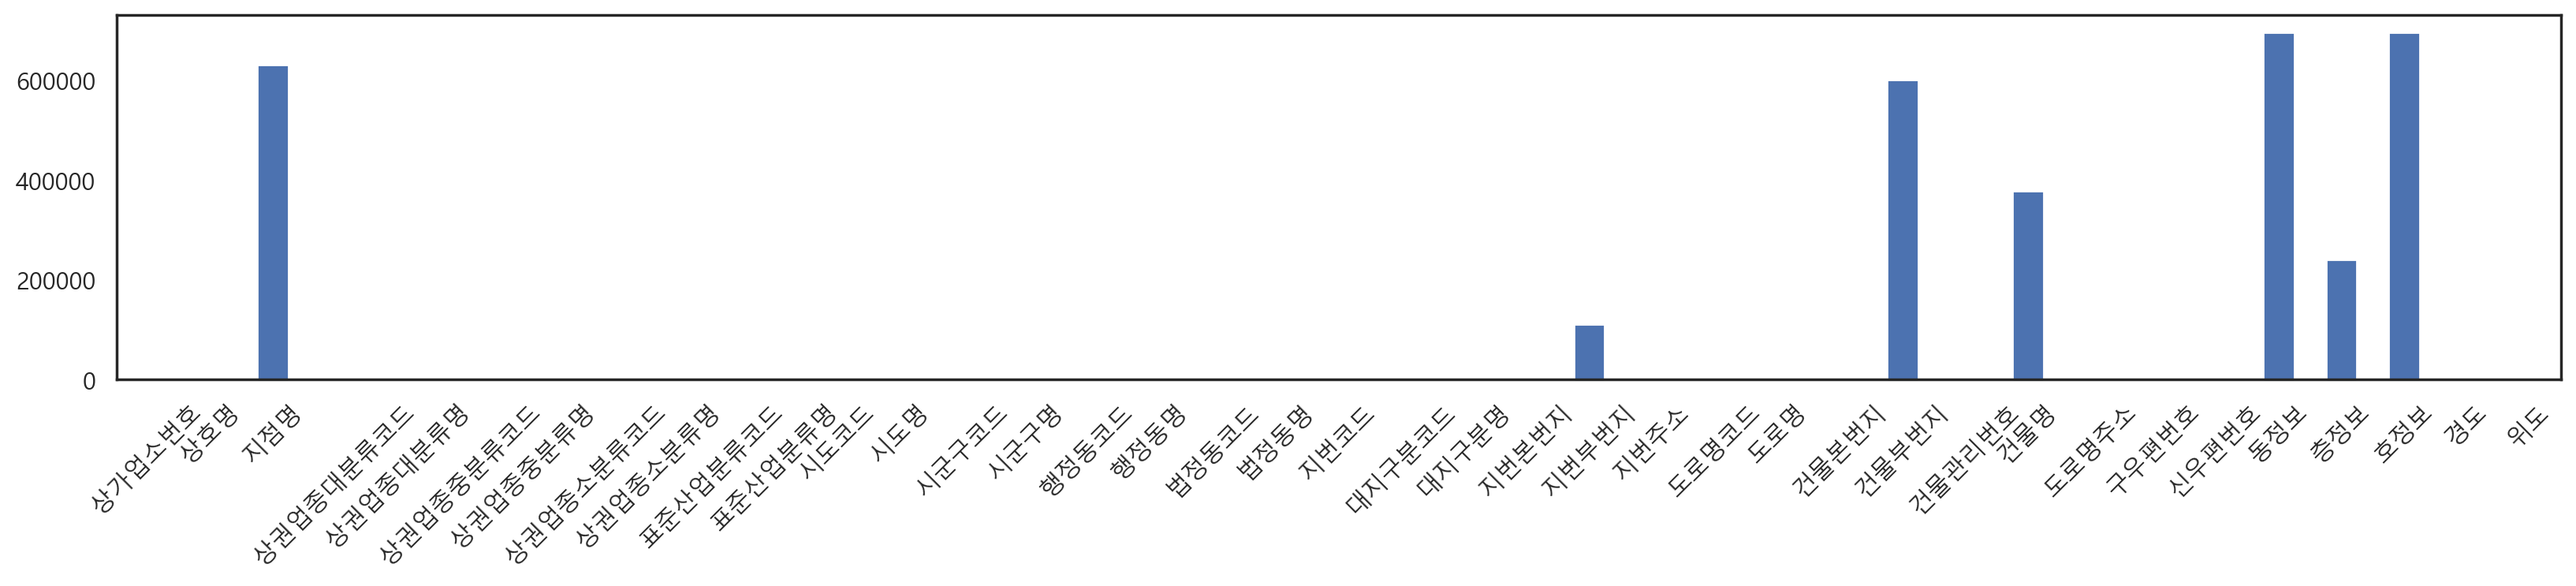

In [40]:
# 열별 결측치 갯수 확인
missing_cnt = df.isna().sum()
# missing_cnt.plot(kind='bar')
missing_cnt.plot.bar(figsize=(20,3), rot=45)
plt.show()

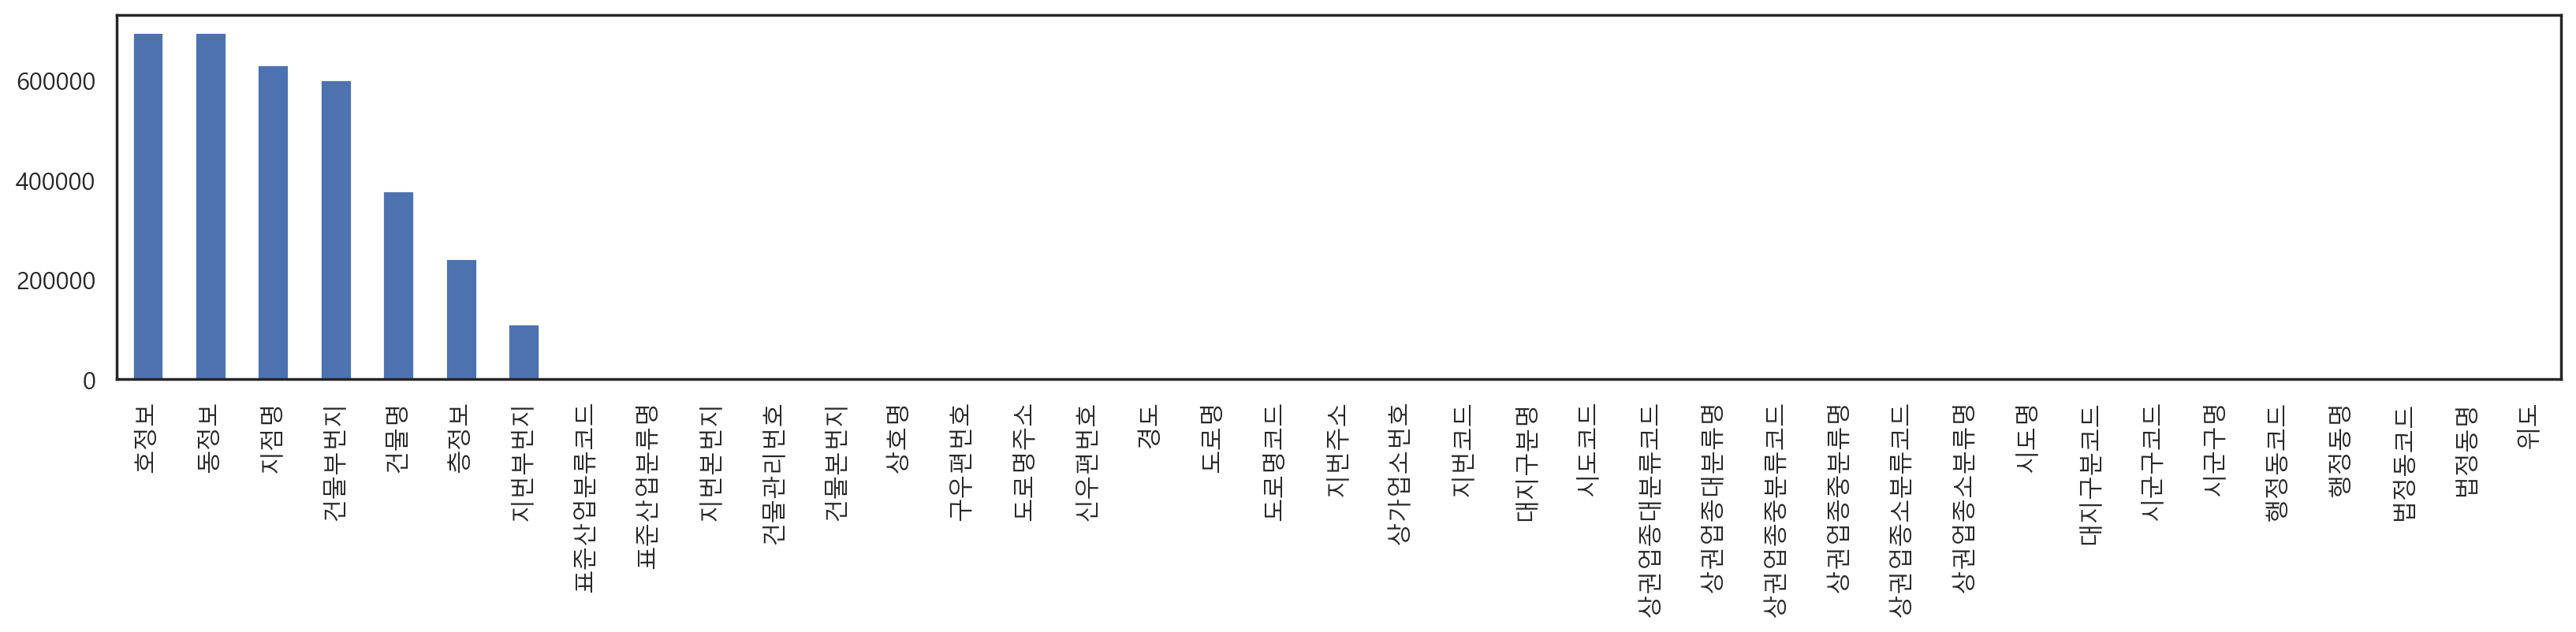

In [41]:
missing_cnt_sorted = missing_cnt.sort_values(ascending=False)
missing_cnt_sorted.plot(kind='bar', figsize=(20,3))
plt.show()

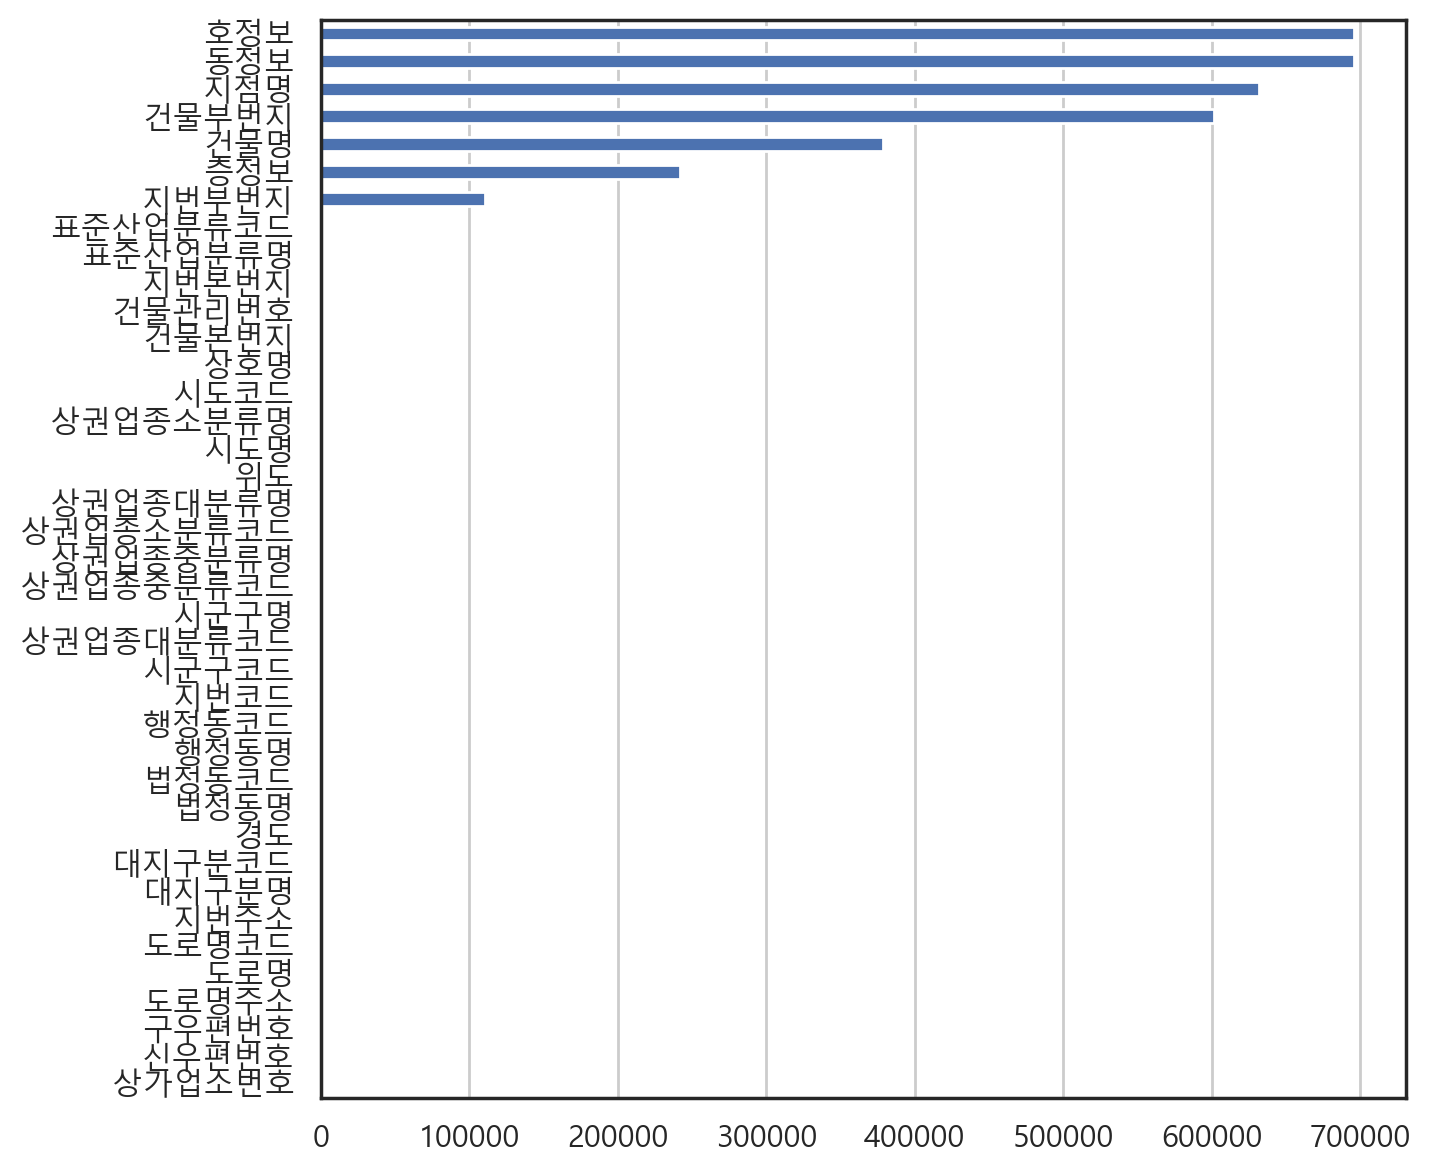

In [42]:
missing_cnt.sort_values().plot(kind='barh', figsize=(7,7))
plt.grid(axis='x')
plt.show()

<Axes: >

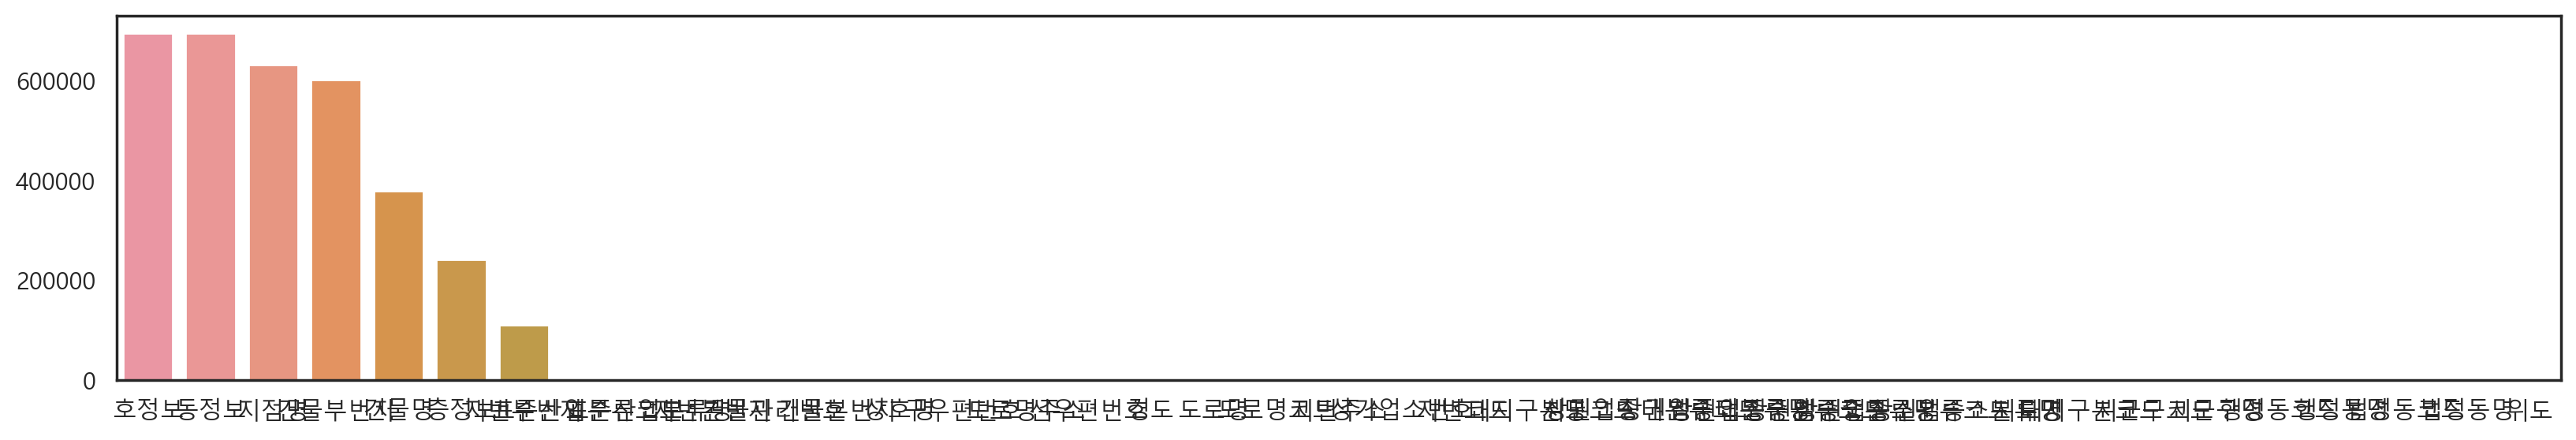

In [39]:
plt.figure(figsize=(20,3))
sns.barplot(x=missing_cnt_sorted.index, y=missing_cnt_sorted)

## ④ 결측치가 없는 컬럼는 제외하고 시각화(정렬전 bar plot, barh plot, 정렬 후 bar plot, barh plot).

In [43]:
only_missing_cnt = missing_cnt[missing_cnt!=0]

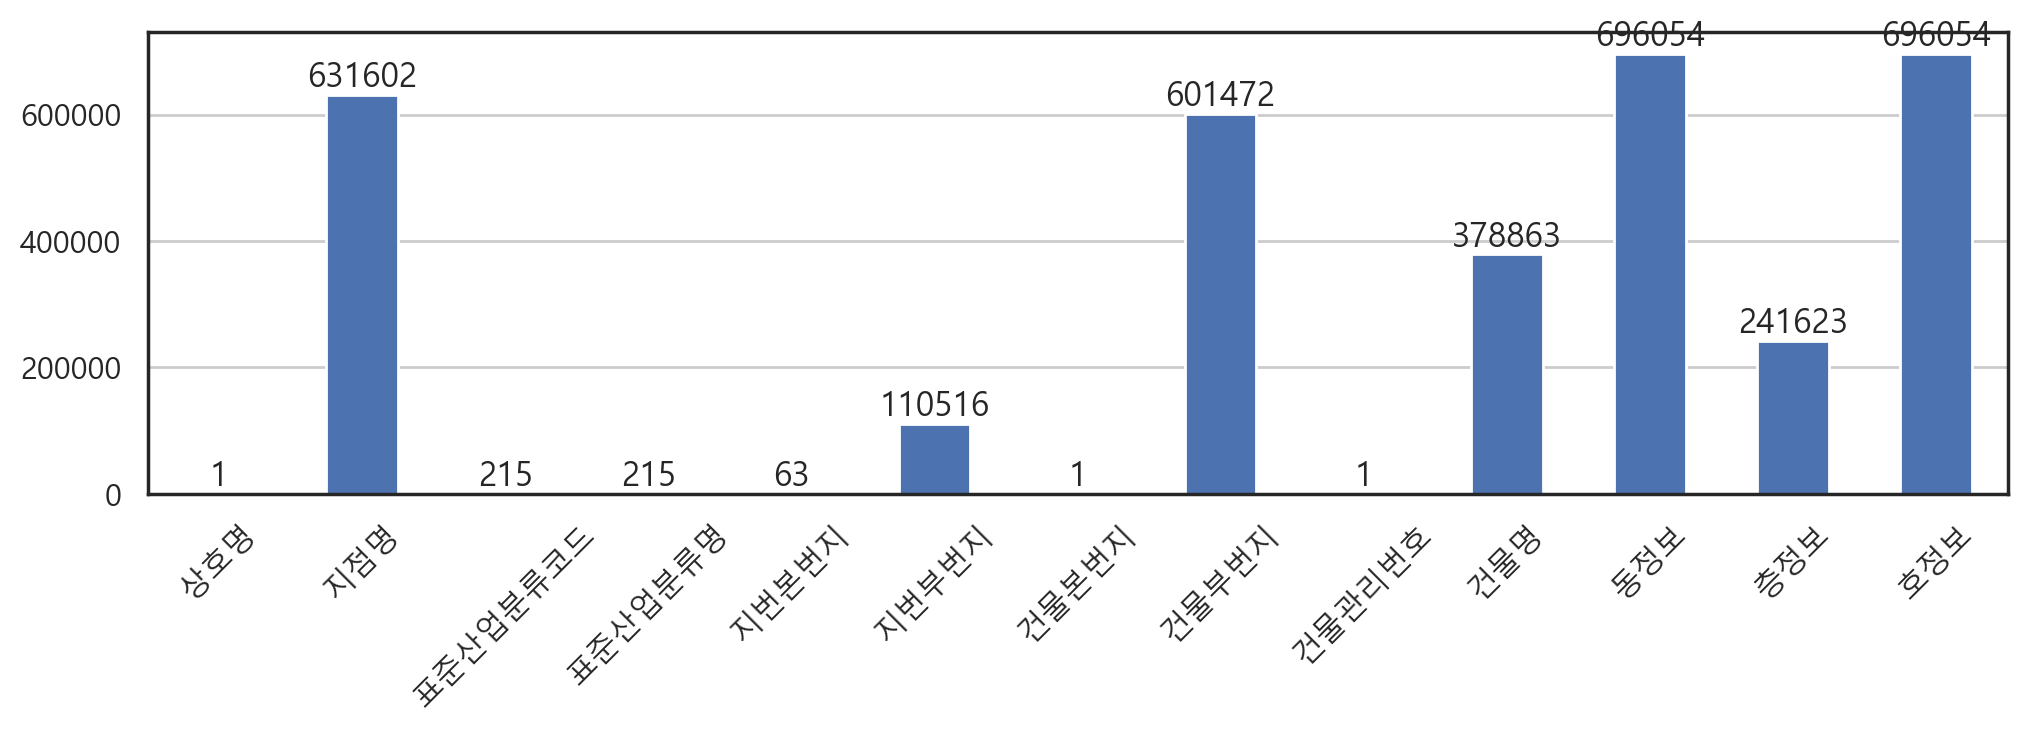

In [47]:
only_missing_cnt.plot.bar(figsize=(12,3), rot=45)
for i, v in enumerate(only_missing_cnt):
    plt.text(i, v, v, va='bottom', ha='center')
plt.grid(axis='y')
plt.show()

# ※ df 백업

In [48]:
df.to_csv('c:/ai/downloads/상가정보/서울부산상가정보백업.csv', index=False)

In [ ]:
df = pd.read_csv('c:/ai/downloads/상가정보/서울부산상가정보백업.csv')

## ⑤ missingno 라이브러리로 결측치 시각화
* [ResidentMario/missingno: Missing data visualization module for Python](https://github.com/ResidentMario/missingno)

* 위의 사이트를 열어 사용법 확인
`pip install missingno`

# 4.	df 데이터 셋에서 사용하지 않을 컬럼은 제거
## ①결측치가 너무 많은 컬럼은 제거한다. 결측치가 너무 많은 상위 9개 컬럼은 제거함.


## ②	컬럼명에 “코드”나 “번호”가 있는 컬럼은 분석에 사용되지 않을 예정입니다. 제거함

**※ 시리즈에 문자함수를 쓰기 위해 참조 :**
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

# ※ df 파일io

# 5. df 데이터 셋의 값을 가져온다(loc함수, iloc함수등을 사용하기도 하고 사용하지 않기도 하며 서브셋을 가져온다)
## ① 상호명 필드만 가져온다


## ②상호명의 종류별 데이터수를 가져온다(df.상호명.value_counts()이용)

## ③	“상호명”과 "도로명주소” 컬럼 가져오기

## ④ 0~2행을 출력하라 (head()함수를 이용하지 않고, loc과 iloc을 이용)

# 6. 기술 통계값 보기 

- [Descriptive statistics - Wikipedia](https://en.wikipedia.org/wiki/Descriptive_statistics)
- [Computations / descriptive stats](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)
- [표준 편차 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/표준편차)
* describe()를 사용하면 데이터 요약을 볼 수 있음(기술통계량)
    - 기본적으로 수치형 데이터를 요약
    - include, exclude 옵션으로 다른 데이터 타입의 요약 수치 출력
    - count, min, max, mean, median, 1사분위수, 3사분위수

### **개별 기술 통계값 구하기**

* [Computations / descriptive stats](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)
* count : 결측치를 제외한 값 갯수
* min, max: 최솟값, 최댓값
* argmin, argmax : 최솟값 인덱스, 최댓값 인덱스 반환
* quantile 특정 사분위수에 해당하는 값을 반환 (0~1 사이)
    * 0.25 : 1사분위 수
    * 0.5 : 2사분위수 (quantile 의 기본 값)
    * 0.75 : 3사분위수
* sum 수치 데이터의 합계
* mean 평균
* median 중앙값(중간값:데이터를 한 줄로 세웠을 때 가운데 위치하는 값, 중앙값이 짝수일 때는 가운데 2개 값의 평균을 구함)

* std, var 표준편차, 분산을 계산
* cumsum 맨 첫 번째 성분부터 각 성분까지의 누적합을 계산 (0 번째 부터 계속 더해짐)
* cumprod 맨 첫번째 성분부터 각 성분까지의 누적곱을 계산 (1 번째 부터 계속 곱해짐)
* cov, corr() : 공분산, 상관계수
* skew 왜도 (오른쪽으로 치우침= 왜도<0, 왼쪽으로 치우침=왜도>0)
* kurt 첨도


## ①	df 데이터셋의 요약기술 통계량

## ②	df 데이터셋의 “지번본번지", "건물본번지” 컬럼의 데이터 개수와  dtype 메모리 사용량을 확인한다.

## ③	“위도", "경도” 컬럼만의 요약 기술통계량

# 7.단별량 수치형 변수 시각화
## ① 위도의 빈도표를 시각화 : plot.hist, hist, sns.displot, sns.histplot

## ② 경도의 빈도표를 시각화 : plot.hist, hist, sns.displot, sns.histplot

# 8. 상관계수
-  두 변수 간에 어떤 선형적 관계를 갖고 있는 지를 분석하는 방법
- [상관 분석 - 위키백과, 우리 모두의 백과사전M](https://ko.wikipedia.org/wiki/상관_분석) 

- 결과의 해석 : r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다. 결정계수(coefficient of determination)는 $r^2$로 계산하며 이것은 X 로부터 Y를 예측할 수 있는 정도를 의미한다.
- ([수학기호 사이트 참조](https://matplotlib.org/2.0.2/users/mathtext.html))

- 일반적으로
    * r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
    * r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
    * r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
    * r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
    * r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
    * r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
    * r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계로 해석한다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/220px-Correlation_examples2.svg.png" width="600">

이미지 출처 : [위키백과](https://ko.wikipedia.org/wiki/상관_분석)


## ① 전체 숫자 컬럼끼리의 상관계수

## ②	상관계수를 이용하여 heatmap 시각화
- 참조 http://seaborn.pydata.org/examples/many_pairwise_correlations.html 

# 9.	경도와 위도 컬럼을 이용하여 산점도

[Anscombe’s quartet — seaborn 0.10.0 documentation](https://seaborn.pydata.org/examples/anscombes_quartet.html)

## ①	X축에는 경도, y축에는 위도 컬럼을 산점도로 시각화

## ②	경도와 위도의 산점도를 “시도명” 컬럼별로 서브플롯으로 시각화

## ③ 위의 1번에서 시각화된 산점도를 바탕으로 회귀선을 그린다.

## ④ 위의 2번에서 시각화된 산점도를 바탕으로 회귀선을 서브 플롯으로 그린다.

# 10. 상권업종대분류명별 상호명의 개수를 도출하고 시각화하기

# 11. 상권업종대분류명이 음식인 서브셋을 이용한 분석
## ① “상권업종대분류명”이 음식인 서브셋을 변수 df_food에 할당하고 확인


## ②	“상권업종대분류명”이 음식이면서, "시군구명”이 강남구 데이터만 가져와 “상권업종중분류명”별로 빈도수를 구함(loc함수를 이용 vs loc함수 이용안함)

# 12.df 데이터셋에서 “상권업종대분류명”이 음식인 데이터 중 서울특별시 데이터 서브셋
- https://seaborn.pydata.org/tutorial/categorical.html : 범주형그래프
## ①	“상권업종대분류명”이 음식인 서브셋 중 서울특별시 데이터만 변수 df_seoul_food에 할당하고 확인


## ② df_seoul_food 데이터 셋을 시군구명, 상권업종중분류명으로 그룹화하여 상점수를 count한 내용을 food_gu 변수에 할당. 

## ③	food_gu 변수를 다음과 같은 스타일의 표로 출력(food_gu 이용).

## ④ 위 3번 스타일의 표를 pivot_table함수를 이용하여 출력

## ⑤ 3번의 결과 중 강남구 데이터만 뽑아 barplot으로 시각화(판다스 plot이용)

## ⑥ 3번 food_gu를 seaborn을 이용하여 구별 음식점 상호 개수를 시각화

## ⑦ 상권업종중분류명별 음식점 상호갯수

## ⑧	Seaborn의 catplot을 이용하여 상권업종중분류별 음식점을 구별로 시각화(서브플롯으로 시각화)

https://seaborn.pydata.org/tutorial/categorical.html

## ⑨	Seaborn의 catplot을 이용하여 구별 음식점을 상권업종중분류명별로 서브 플롯으로 시각화

# 13.	구별로 학원수 비교 : 서울 대치동이나 목동에 사교육이 발달되었다는 가설을 뒷받침할 수 있는 분석
## ① 서울시 교육(상권업종대분류명 이용) 데이터를 df_academy 변수에 할당하고 확인


## ②	df_academy 데이터 셋을 상호명별로 빈도수 출력(value_counts()함수 이용하거나 groupby이용)

## ③ df_academy 데이터 셋을 상호명별로 빈도수 상위 10개 출력

## ④ df_academy 데이터 셋을 시군구명 별로 빈도수 출력(학원이 가장 많은 구부터 출력)

## ⑤df_academy 데이터 셋에서 어떤 종류의 학원들이 많은지 상위10개만 academy_count변수에 할당하고 출력(상권업종소분류명 컬럼 이용)

## ⑥ df_academy 데이터셋에서 상권업종소분류명별로 빈도수를 구했을 때 빈도가 1000이상인 데이터만 따로 academy_count_1000변수에 할당

## ⑦ df_academy 데이터셋을 “시군구명”, "상권업종소분류명” 별 상호명 빈도수를 academy_group 변수에 할당 출력

## ⑧ academy_group 데이터셋에서 강남구 데이터만 출력 및 시각화(barplot)

## ⑨ df_academy데이터 중 “법정동명”컬럼이 “대치동”과 “목동”인 데이터만 가져와 상권업종소분류명별 빈도수 출력

## ⑩“상권업종소분류명”별 "시군구명” 별 상호명 빈도수를 g변수에 할당하고 출력

## ⑪ g변수의 내용중 "상권업종소분류명” 컬럼이 “입시·교과학원”데이터만 시각화(pandas의 plot.bar, pandas의 barh, seaborn의 barplot)

# 14. 서울시 데이터만 경도와 위도를 산점도로 시각화
## ① df_academy 데이터셋의 경도와 위도를 “시군명”별로 색상을 다르게 scatterplot으로 시각화


https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot : 범례사용

## ② df_academy 데이터셋의 경도와 위도를 “상권업종소분류명”별로 색상을 다르게 scatterplot으로 시각화

## ③ df_academy 데이터셋 중 “입시·교과학원” 데이터만, 경도와 위도를 “시군구명”별로 색상을 다르게 scatterplot으로 시각화

## ④ df_academy 데이터셋 중 “태권도/무술학원” 데이터만, 경도와 위도를 “시군명”별로 색상을 다르게 scatterplot으로 시각화

## ⑤ df_academy 데이터셋 중 “입시·교과학원” 데이터와 “태권도/무술학원” 데이터만, 경도와 위도를 “상권업종소분류명”별로 색상을 다르게 scatterplot으로 시각화

# 15. 지도시각화 : Folium
` 아나콘다 프롬프트에서 아래의 둘 중 하나를 실행`

`pip install folium`

`conda install -c conda-forge folium`

-	docs : https://python-visualization.github.io/folium/latest/getting_started.html?utm_source=chatgpt.com
-	Quickstart : https://python-visualization.github.io/folium/version-v0.9.1/quickstart.html?utm_source=chatgpt.com
